# Social Network Analysis
## Analysis of the [Marvel Comic Universe](http://syntagmatic.github.io/exposedata/marvel/)

A description of all characters of the Marvel Universe can be found [here](http://marvel.com/characters/browse).

### Preparation: Install `networkx`

```bash
conda install networkx
pip install python-louvain
```

The `networkx` documentation can be found [here](http://networkx.readthedocs.io/)

In [31]:
import networkx as nx
import csv

In [32]:
G = nx.Graph(name="Hero Network")
with open('../../data/hero-network.csv', 'r') as data:
    reader = csv.reader(data)
    for row in reader:
        G.add_edge(*row)

In [33]:
nx.info(G)

'Name: Hero Network\nType: Graph\nNumber of nodes: 6426\nNumber of edges: 167219\nAverage degree:  52.0445'

In [34]:
G.order() # number of nodes

6426

In [35]:
G.size() # number of edges

167219

# Graph Visualization

![The whole Universe](http://syntagmatic.github.io/exposedata/marvel/screenshots/dataset1.png)

=> Nice, but Hairball-Effect

=> Let's try out [Ego-Graphs](http://networkx.readthedocs.io/en/stable/reference/generated/networkx.generators.ego.ego_graph.html)

## Ego Graph of an arbitrary Hero

In [45]:
hero = 'MACE' # Jeffrey Mace, aka Captain America

In [46]:
ego=nx.ego_graph(G,hero,radius=1)
nx.info(ego)

'Name: Hero Network\nType: Graph\nNumber of nodes: 10\nNumber of edges: 32\nAverage degree:   6.4000'

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings; warnings.simplefilter('ignore')

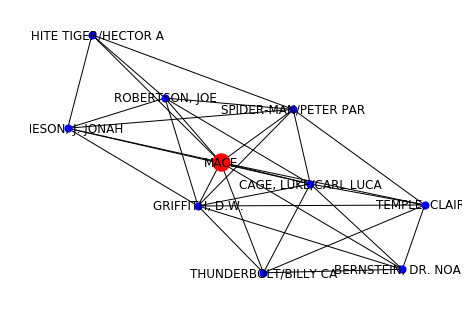

In [48]:
pos = nx.spring_layout(ego)
nx.draw(ego,pos,node_color='b',node_size=50, with_labels=True)

# ego large and red
nx.draw_networkx_nodes(ego,pos,nodelist=[hero],node_size=300,node_color='r');

# Most important Heros

## What means 'important'?

- **Degree**:<br>
    Number of connections: Measure of popularity.<br>
    It is useful in determining nodes that can quickly spread information.

- **Betweenness**:<br>
    Shows which nodes are likely pathways of information, and can 
    be used to determine where the graph will break apart if the node is removed.
    
- **Closeness**:<br> 
    This is a measure of reach, that is, how fast information will spread to all
    other nodes from this particular node. Nodes with the most central closeness enjoy
    short durations during broadcast communication.

- **Eigenvector**:<br>
    Measure of related influence. Who is closest to the most
    important people in the graph? This can be used to show the power behind the
    scenes, or to show relative influence beyond popularity.
    
For practical samples please check out these [Centrality Exercises](http://www.sscnet.ucla.edu/soc/faculty/mcfarland/soc112/cent-ans.htm).
    
(Taken from [Packt - Practical Datascience Cookbook](https://www.packtpub.com/big-data-and-business-intelligence/practical-data-science-cookbook))

## 1. Degree Concept

* **Degrees** == number of connections of a node
* **Degree Centrality** == percent of nodes in the graph that a node is connected to

![Degree Concept](../images/4-1-degreeCentralitySamples.png) *CD here is the Degree Centrality of the whole Graph.

In [49]:
G.degree() # see also ego-graph above

{'LITTLE, ABNER': 22,
 'PRINCESS ZANDA': 11,
 "BLACK PANTHER/T'CHAL": 711,
 'STEELE, SIMON/WOLFGA': 9,
 'FORTUNE, DOMINIC': 15,
 'ERWIN, CLYTEMNESTRA': 61,
 'IRON MAN/TONY STARK ': 1522,
 'IRON MAN IV/JAMES R.': 465,
 'RAVEN, SABBATH II/EL': 11,
 'CARNIVORE/COUNT ANDR': 45,
 'GHOST': 35,
 'ZIMMER, ABE': 72,
 'FU MANCHU': 42,
 'TARR, BLACK JACK': 30,
 'SMITH, SIR DENIS NAY': 28,
 'SHANG-CHI': 127,
 'STARSHINE II/BRANDY ': 166,
 'ROM, SPACEKNIGHT': 241,
 'MAN-THING/THEODORE T': 188,
 'WU, LEIKO': 44,
 'DOCTOR DREDD': 14,
 'RESTON, CLIVE': 32,
 'JACKSON, STEVE': 71,
 'MYSTIQUE/RAVEN DARKH': 395,
 'BLOB/FRED J. DUKES': 423,
 'TORPEDO III/BROCK JO': 224,
 'PYRO/ALLERDYCE JOHNN': 298,
 'AVALANCHE/DOMINIC PE': 277,
 'ROGUE /': 831,
 'DESTINY II/IRENE ADL': 228,
 'HYBRID/JAMES JIMMY M': 30,
 'CLARK, SARAH': 53,
 'KILLBURN, MACK': 17,
 'JONES, TAMMY ANNE': 52,
 'JONES, LORRAINE LORR': 52,
 'JONES, NELL': 46,
 'JONES, DANIEL DANNY': 52,
 'CLARK, JOHN': 53,
 'SUB-MARINER/NAMOR MA': 979,
 'VASHTI'

In [50]:
G.degree('MACE')

9

In [51]:
# degree_centrality of node 'MACE' == standardized degree
G.degree('MACE')/(G.order()-1)

0.0014007782101167316

In [52]:
nx.degree_centrality(G)['MACE']

0.0014007782101167316

## 2. Betweenness Concept

- on how many (shortest) paths does a node lie and thus enables brookerage?
![Brookerage](../images/4-1-brokerage.png)
- Calculation ![Betweenness Calculation](../images/4-1-betweenness-sample-1.png)

In [53]:
?nx.betweenness_centrality # SLOW!!!

## 3. Closeness Concept

- Intuition: One still wants to be in the middle of things, not too far from the center
![Closeness != Brookerage](../images/4-1-closeness-1.png)
- Calculation: Sum of Reciprokal Shortest Paths ![Closeness Calculation](../images/4-1-closeness-sample-1.png)

In [54]:
?nx.closeness_centrality # SLOW!!!

## 3. Eigenvector Concept

- Page Rank => Pages, which are linked by popular pages, have a higher Page Rank
- finds the most influential nodes

In [55]:
nx.eigenvector_centrality(G)

{'LITTLE, ABNER': 0.002319111328491201,
 'PRINCESS ZANDA': 0.0016407228499655294,
 "BLACK PANTHER/T'CHAL": 0.0690453152743753,
 'STEELE, SIMON/WOLFGA': 0.0011927849258506224,
 'FORTUNE, DOMINIC': 0.00214698263655152,
 'ERWIN, CLYTEMNESTRA': 0.006381361736749264,
 'IRON MAN/TONY STARK ': 0.10254000426744447,
 'IRON MAN IV/JAMES R.': 0.04378632893144683,
 'RAVEN, SABBATH II/EL': 0.0014601069197244237,
 'CARNIVORE/COUNT ANDR': 0.007853117625566265,
 'GHOST': 0.003763175397583633,
 'ZIMMER, ABE': 0.008785119590995075,
 'FU MANCHU': 0.0035654881251059637,
 'TARR, BLACK JACK': 0.001574399878665774,
 'SMITH, SIR DENIS NAY': 0.0015596944337678397,
 'SHANG-CHI': 0.016531979931656296,
 'STARSHINE II/BRANDY ': 0.02007851377960658,
 'ROM, SPACEKNIGHT': 0.03284583649431943,
 'MAN-THING/THEODORE T': 0.025162867559671565,
 'WU, LEIKO': 0.005940407411039808,
 'DOCTOR DREDD': 0.0010980285607547272,
 'RESTON, CLIVE': 0.002609210835812881,
 'JACKSON, STEVE': 0.008921608976739485,
 'MYSTIQUE/RAVEN DARKH':

# 1. Exercise

- Determine the 20 most popular Heros by their degrees
- Draw the overall Degree Distribution (`plt.hist`)

In [17]:
# TODO

[('CAPTAIN AMERICA', 1908),
 ('SPIDER-MAN/PETER PAR', 1737),
 ('IRON MAN/TONY STARK ', 1522),
 ('THING/BENJAMIN J. GR', 1416),
 ('MR. FANTASTIC/REED R', 1379),
 ('WOLVERINE/LOGAN ', 1371),
 ('HUMAN TORCH/JOHNNY S', 1361),
 ('SCARLET WITCH/WANDA ', 1325),
 ('THOR/DR. DONALD BLAK', 1289),
 ('BEAST/HENRY &HANK& P', 1267),
 ('VISION ', 1241),
 ('INVISIBLE WOMAN/SUE ', 1236),
 ('HAWK', 1175),
 ('WASP/JANET VAN DYNE ', 1091),
 ('ANT-MAN/DR. HENRY J.', 1082),
 ('CYCLOPS/SCOTT SUMMER', 1081),
 ('ANGEL/WARREN KENNETH', 1073),
 ('STORM/ORORO MUNROE S', 1072),
 ('SHE-HULK/JENNIFER WA', 1071),
 ('DR. STRANGE/STEPHEN ', 1067)]

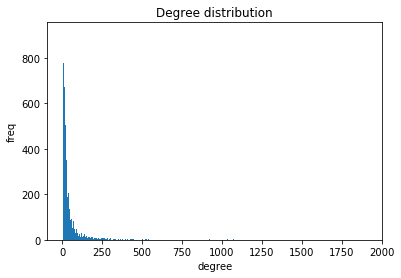

In [18]:
# TODO

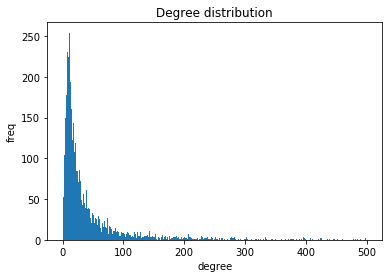

In [19]:
# Cut of the hightest values (>500)
# TODO

# 2. Exercise

- Determine the 20 most influential Heros by their eigenvector-centrality
- Determine also their degrees and compare with the degree distribution: Are the most influential also the most popular heros?

In [31]:
# TODO

# Communities

## Connected Components (Graph Theorie)

In [32]:
cc = list(nx.connected_components(G))

In [33]:
len(cc)

4

In [34]:
[len(c) for c in cc]

[6408, 9, 7, 2]

In [35]:
[list(c)[:10] for c in cc]

[['VAGABOND/PRISCILLA L',
  'WANDERER',
  'REESE, MURRAY',
  'KID QUARRY',
  'ROWEN, CARL',
  'ANGLER',
  'MELTER II/BRUNO HORG',
  'QUISLING',
  'MARTINEX',
  'JUSUR'],
 ['OSWALD',
  'ORWELL',
  'ASHER, MICHAEL',
  'FAGIN',
  'HOFFMAN',
  'NILES, SEN. CATHERIN',
  'LUDLUM, ROSS',
  'ASHER, DONNA',
  'ASHER, CARL'],
 ['AMAZO-MAXI-WOMAN/',
  'MANT/ERNEST',
  'DARLEGUNG, GEN.',
  'SWORDSMAN IV/',
  'MISS THING/MARY',
  'STERLING',
  'PANTHER CUB/'],
 ['MASTER OF VENGEANCE', 'STEEL SPIDER/OLLIE O']]

In [36]:
cc[3]

{'MASTER OF VENGEANCE', 'STEEL SPIDER/OLLIE O'}

## 'Real' Communities

- Cliques: Every member is connected with each other members
- k-Cores: Every member is connected with at least k other members

- ... n-Cliques, n-Clubs, ... (more restrictive than k-Cores)

In [37]:
import community

In [38]:
partition = community.best_partition(G)
partition # hero -> partion-no.

{'LITTLE, ABNER': 0,
 'PRINCESS ZANDA': 1,
 "BLACK PANTHER/T'CHAL": 2,
 'STEELE, SIMON/WOLFGA': 0,
 'FORTUNE, DOMINIC': 0,
 'ERWIN, CLYTEMNESTRA': 0,
 'IRON MAN/TONY STARK ': 0,
 'IRON MAN IV/JAMES R.': 0,
 'RAVEN, SABBATH II/EL': 0,
 'CARNIVORE/COUNT ANDR': 1,
 'GHOST': 0,
 'ZIMMER, ABE': 0,
 'FU MANCHU': 1,
 'TARR, BLACK JACK': 3,
 'SMITH, SIR DENIS NAY': 3,
 'SHANG-CHI': 1,
 'STARSHINE II/BRANDY ': 3,
 'ROM, SPACEKNIGHT': 3,
 'MAN-THING/THEODORE T': 3,
 'WU, LEIKO': 0,
 'DOCTOR DREDD': 3,
 'RESTON, CLIVE': 3,
 'JACKSON, STEVE': 3,
 'MYSTIQUE/RAVEN DARKH': 3,
 'BLOB/FRED J. DUKES': 3,
 'TORPEDO III/BROCK JO': 2,
 'PYRO/ALLERDYCE JOHNN': 3,
 'AVALANCHE/DOMINIC PE': 3,
 'ROGUE /': 3,
 'DESTINY II/IRENE ADL': 3,
 'HYBRID/JAMES JIMMY M': 3,
 'CLARK, SARAH': 3,
 'KILLBURN, MACK': 3,
 'JONES, TAMMY ANNE': 3,
 'JONES, LORRAINE LORR': 3,
 'JONES, NELL': 3,
 'JONES, DANIEL DANNY': 3,
 'CLARK, JOHN': 3,
 'SUB-MARINER/NAMOR MA': 2,
 'VASHTI': 2,
 'SEAWEED MAN': 2,
 'NOVA/RICHARD RIDER': 4,
 'FI

# 3. Exercise

- how many communities/partions have been found?
- how many heros are in each community/partition?
- how small is the smallest community and who are its members?
- draw an histogram, which shows the sizes of the single communities.

In [27]:
# TODO: How many partitions?

31

In [28]:
# TODO: How many heros per partition?

[(3, 1585),
 (2, 1266),
 (1, 1143),
 (0, 1137),
 (5, 482),
 (6, 162),
 (4, 153),
 (7, 122),
 (8, 66),
 (10, 62),
 (9, 34),
 (12, 30),
 (13, 26),
 (19, 23),
 (16, 22),
 (17, 21),
 (15, 11),
 (11, 9),
 (22, 8),
 (23, 8),
 (18, 7),
 (25, 7),
 (24, 6),
 (27, 6),
 (14, 5),
 (20, 5),
 (26, 5),
 (29, 5),
 (21, 4),
 (28, 4),
 (30, 2)]

In [40]:
# TODO members of the smallest community

['STEEL SPIDER/OLLIE O', 'MASTER OF VENGEANCE']

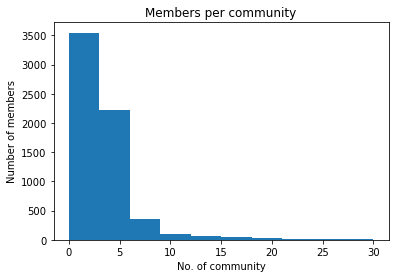

In [30]:
# TODO histogram of community sizes

# Exercise X

Analyse [Donald Trumps World](https://github.com/BuzzFeedNews/trumpworld).